In [1]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

# Exercise 1:

Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

0: 0.112 probability
1: 0.289 probability
2: 0.278 probability
3: 0.183 probability
4: 0.101 probability
5: 0.029 probability
6: 0.007 probability
7: 0.001 probability
8: 0.0 probability
9: 0.0 probability
10: 0.0 probability


Text(0, 0.5, 'Count')

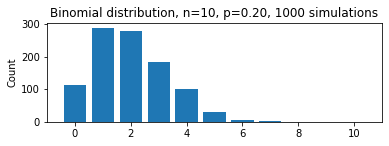

In [39]:
# Create a binominal distribution in which p represents the probability of any one given quantum being released,
# while n is the number of times the Bernoulli process is performed (i.e. the binominal distriution is sampled).
# num_experiemnts is the number of times this sampling is performed.
p = 0.2
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)
counts = collections.Counter(outcomes)

# Print probability of each possible outcome (simulated over 1000 trials)
for i in np.arange(11):
    print(str(i)+':',counts[i]/1000,'probability')

# Show a bar plot (histogram) of all of the possible outcomes
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Exercise 2:
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see here for an extended discussion). The maximum value of this function is called the maximum likelihood.

Probability of 8 quanta if p is 0.1: 0.0
Probability of 8 quanta if p is 0.7: 0.127
{0.0: 0.0, 0.1: 3.645000000000009e-07, 0.2: 7.372800000000005e-05, 0.3: 0.0014467004999999982, 0.4: 0.010616832, 0.5: 0.04394531249999999, 0.6: 0.12093235199999994, 0.7: 0.23347444049999988, 0.8: 0.301989888, 0.9: 0.19371024449999993, 1.0: 0.0}


<BarContainer object of 11 artists>

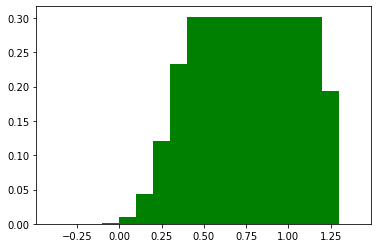

In [48]:
# Create a binominal distribution in which p represents the probability of any one given quantum being released,
# while n is the number of times the Bernoulli process is performed (i.e. the binominal distriution is sampled).
# num_experiemnts is the number of times this sampling is performed.
p = 0.1
n = 14                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)
counts = collections.Counter(outcomes)

# Print probability of each possible outcome (simulated over 1000 trials)
print('Probability of 8 quanta if p is 0.1:',counts[8]/1000)

# Re-set true release probability to 0.7
p = 0.7
n = 14                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)
counts = collections.Counter(outcomes)

print('Probability of 8 quanta if p is 0.7:',counts[8]/1000)

# Get probility for each decile of probability

n = 10                          # Number of available quanta
pRelease = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])                  # Release probabilty 
k = np.arange(11)               # Possible values of k (measured events)
probs_of_8 = {}
for i in pRelease:
    probs = binom.pmf(k,n,i) # Array of probabilities of obtaining those values of k, given n and prelease
    probs_of_8[i] = probs[8]
    
print(probs_of_8)

# Plot quantile probabilities as histogram
plt.bar(probs_of_8.keys(), probs_of_8.values(), color='g')


# Exercise 3:
Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

Total Probability: 1.2378187214998312e-07
Total Log Probability: -15.904744915931484
{0.1: 1.2378187214998312e-07, 0.2: 0.0001732842750806354, 0.30000000000000004: 0.0045505754228290915, 0.4: 0.01897003133922161, 0.5: 0.022396467626094884, 0.6: 0.008431125039654049, 0.7000000000000001: 0.0008358199756216693, 0.8: 1.08302671925397e-05, 0.9: 1.5281712611108882e-09}
{0.1: -15.904744915931484, 0.2: -8.660577103497952, 0.30000000000000004: -5.3925015874596545, 0.4: -3.9648948429953763, 0.5: -3.7988520278199696, 0.6: -4.775825059211705, 0.7000000000000001: -7.087097308234062, 0.8: -11.433165825737735, 0.9: -20.29919407060393}


<BarContainer object of 9 artists>

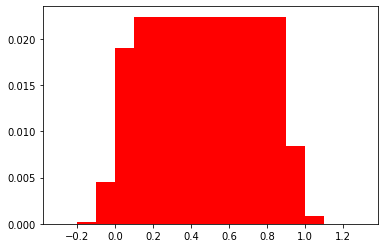

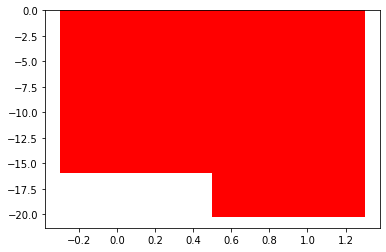

In [57]:
# Create a binominal distribution in which p represents the probability of any one given quantum being released,
# while n is the number of times the Bernoulli process is performed (i.e. the binominal distriution is sampled).
# num_experiemnts is the number of times this sampling is performed.
p_release = 0.1
n1 = 14
n2 = 14 
k1 = 8
k2 = 5
p1 = binom.pmf(k1,n1,p_release)
p2 = binom.pmf(k2,n2,p_release)
print('Total Probability:', (p1*p2))
print('Total Log Probability:', (np.log(p1)+np.log(p2)))

tot_probs_of_8_5 = {}
tot_logprobs_of_8_5 = {}
for p_rel in np.arange(0.1,1.0,0.1):
    p1 = binom.pmf(k1,n1,p_rel)
    p2 = binom.pmf(k2,n2,p_rel)
    tot_probs_of_8_5[p_rel] = (p1*p2)
    tot_logprobs_of_8_5[p_rel] = (np.log(p1)+np.log(p2))
    
print(tot_probs_of_8_5)
print(tot_logprobs_of_8_5)

# Plot quantile probabilities as histogram
plt.figure(0)
plt.bar(tot_probs_of_8_5.keys(), tot_probs_of_8_5.values(), color='r')

plt.figure(1)
plt.bar(tot_logprobs_of_8_5.keys(), tot_logprobs_of_8_5.values(), color='r')

# Exercise 5:
Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute  𝑝̂  . Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [66]:
p = 0.3 # True release probability
n = 14  # Number of available quanta
k = 7   # Measured number of quantal events
p_val = st.binom_test(k, n, p, alternative='greater')
print('p-value:',p_val)

prob = binom.pmf(k,n,p)
print('Probability of measurement if Null Hypothesis true:',prob)

p-value: 0.09328189116275991
Probability of measurement if Null Hypothesis true: 0.06181335872712003
